# Einstein Rosen waves and the self similarity hypothesis in cylindrical symmetry by Harada Nakao and Nolan
##  Geoff Cope
##  Univeristy of Utah
##  December 24, 2021  Christmas Eve!

Einstein Tensor for Metric 2.2 needs to set equal to a yet to be defined stress energy tensor.  Here we concentrate on the metric given as equation 2.13 and find the vacuum field equations for this metric.

https://arxiv.org/abs/0812.3462

In [26]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [27]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [28]:
x,u,v,phi,z,du,dv,dphi,dz,dt,dx = symbols('x u v phi z du dv dphi dz dt dx')

In [29]:
gamma, psi,r = symbols('gamma psi r')

In [30]:
gamma = Function('gamma')(t,x)
gamma

In [31]:
psi = Function('psi')(t,x)
psi

In [32]:
variables = Matrix( [t,x,phi,z] )
variables

⎡t⎤
⎢ ⎥
⎢x⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [33]:
differentials = Matrix( [dt,dx,dphi,dz] ) 
differentials

⎡ dt ⎤
⎢    ⎥
⎢ dx ⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [34]:
lineElement = expand(exp(2*(gamma-psi))*( - dt**2 + dx**2 ) + exp(-2*psi)*x**2*dphi**2 + exp(2*psi)*dz**2) 
lineElement

In [35]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  2⋅γ(t, x)  -2⋅ψ(t, x)                                                    ⎤
⎢-ℯ         ⋅ℯ                      0                   0             0     ⎥
⎢                                                                           ⎥
⎢                          2⋅γ(t, x)  -2⋅ψ(t, x)                            ⎥
⎢           0             ℯ         ⋅ℯ                  0             0     ⎥
⎢                                                                           ⎥
⎢                                                  2  -2⋅ψ(t, x)            ⎥
⎢           0                       0             x ⋅ℯ                0     ⎥
⎢                                                                           ⎥
⎢                                                                  2⋅ψ(t, x)⎥
⎣           0                       0                   0         ℯ         ⎦

In [36]:
import sympy

In [37]:
m = sympy.Array(g)
m

⎡  2⋅γ(t, x)  -2⋅ψ(t, x)                                                    ⎤
⎢-ℯ         ⋅ℯ                      0                   0             0     ⎥
⎢                                                                           ⎥
⎢                          2⋅γ(t, x)  -2⋅ψ(t, x)                            ⎥
⎢           0             ℯ         ⋅ℯ                  0             0     ⎥
⎢                                                                           ⎥
⎢                                                  2  -2⋅ψ(t, x)            ⎥
⎢           0                       0             x ⋅ℯ                0     ⎥
⎢                                                                           ⎥
⎢                                                                  2⋅ψ(t, x)⎥
⎣           0                       0                   0         ℯ         ⎦

In [38]:
from einsteinpy.symbolic import *

In [39]:
syms = sympy.symbols("t x phi z")
t,x,phi,z = syms

In [40]:
metric = MetricTensor(m,syms)

In [41]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡∂             ∂            ∂             ∂                                                                            ⎤  
⎢⎢──(γ(t, x)) - ──(ψ(t, x))  ──(γ(t, x)) - ──(ψ(t, x))               0                                0                 ⎥  
⎢⎢∂t            ∂t           ∂x            ∂x                                                                           ⎥  
⎢⎢                                                                                                                      ⎥  
⎢⎢∂             ∂            ∂             ∂                                                                            ⎥  
⎢⎢──(γ(t, x)) - ──(ψ(t, x))  ──(γ(t, x)) - ──(ψ(t, x))               0                                0                 ⎥  
⎢⎢∂x            ∂x           ∂t            ∂t                                                                           ⎥  
⎢⎢                                                                                                                      ⎥  
⎢⎢      

In [42]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡  ⎛    2              2                           2     2              2         ⎞                                        
⎢  ⎜   ∂              ∂               ⎛∂          ⎞     ∂              ∂          ⎟   ∂             ∂                      
⎢x⋅⎜- ───(γ(t, x)) + ───(γ(t, x)) - 2⋅⎜──(ψ(t, x))⎟  + ───(ψ(t, x)) - ───(ψ(t, x))⎟ + ──(γ(t, x)) - ──(ψ(t, x))            
⎢  ⎜    2              2              ⎝∂t         ⎠      2              2         ⎟   ∂x            ∂x                     
⎢  ⎝  ∂t             ∂x                                ∂t             ∂x          ⎠                                        
⎢──────────────────────────────────────────────────────────────────────────────────────────────────────────────            
⎢                                                      x                                                                   
⎢                                                                                                                          
⎢       

In [43]:
einst = EinsteinTensor.from_metric(metric)
simplify(einst.tensor())

⎡                                        ∂                                               ∂                                 
⎢               2                2   1.0⋅──(γ(t, x))                                     ──(γ(t, x))                       
⎢  ⎛∂          ⎞    ⎛∂          ⎞        ∂x                    ∂           ∂             ∂t                                
⎢- ⎜──(ψ(t, x))⎟  - ⎜──(ψ(t, x))⎟  + ───────────────       - 2⋅──(ψ(t, x))⋅──(ψ(t, x)) + ───────────                       
⎢  ⎝∂t         ⎠    ⎝∂x         ⎠           x                  ∂t          ∂x                 x                            
⎢                                                                                                                          
⎢                                   ∂                                                         ∂                            
⎢                                   ──(γ(t, x))                      2                2   1.0⋅──(γ(t, x))                  
⎢       

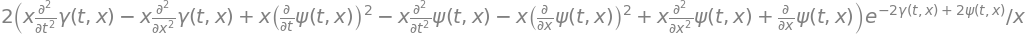

In [44]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [45]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [46]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

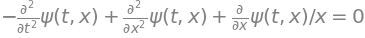

In [66]:
equation2pt14 = Eq(expand((1/x)*Ric.tensor()[2,2].args[1]),0)
equation2pt14

In [59]:
equation2pt15 = Eq(diff(gamma,x),solve( simplify(einst.tensor())[0,0] , diff(gamma,x))[0])
equation2pt15

In [50]:
equation2pt16 = Eq(diff(gamma,t),solve( Ric.tensor()[1,0] , diff(gamma,t) )[0] )
equation2pt16

In [68]:
vacuumFieldEquations = Matrix([equation2pt14,equation2pt15,equation2pt16])
vacuumFieldEquations

⎡                                 ∂               ⎤
⎢     2              2            ──(ψ(t, x))     ⎥
⎢    ∂              ∂             ∂x              ⎥
⎢ - ───(ψ(t, x)) + ───(ψ(t, x)) + ─────────── = 0 ⎥
⎢     2              2                 x          ⎥
⎢   ∂t             ∂x                             ⎥
⎢                                                 ⎥
⎢                ⎛             2                2⎞⎥
⎢∂               ⎜⎛∂          ⎞    ⎛∂          ⎞ ⎟⎥
⎢──(γ(t, x)) = x⋅⎜⎜──(ψ(t, x))⎟  + ⎜──(ψ(t, x))⎟ ⎟⎥
⎢∂x              ⎝⎝∂t         ⎠    ⎝∂x         ⎠ ⎠⎥
⎢                                                 ⎥
⎢    ∂                 ∂           ∂              ⎥
⎢    ──(γ(t, x)) = 2⋅x⋅──(ψ(t, x))⋅──(ψ(t, x))    ⎥
⎣    ∂t                ∂t          ∂x             ⎦